## Naive Bayes

This algorithm is based on Bayes theorem which can be seen below.

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}, $$

where

- $P(A|B)$ is a conditional probability. The probability of event $A$ occurring given that $B$ is true. It is also called the posterior probability of $A$ given $B$.
- $P(A), P(B)$  are the probabilities of observing $A$ and $B$ respectively without any given conditions. They are known as the prior probability and marginal probability.

### Example

Imageine we have two coins. Each one has a $50$% chance that we'll get `Head` and $50$% chance that we'll get `Tail` after flipping the coin.<br>
Let's flip the coins and see what are the possible outcomes, or what would be the sample space $\mathbb{S}$.

<div style="display: flex; justify-content: center;">
<img src="./images/bayes1.png" alt="Flower" style="width:500px;"/></div>

$$ \mathbb{S} = \{ HH, HT, TH, TT \} $$

Let $A$ be the event that second coin is `Head` and $B$ be the event that first coin is `Tail`. 

$$ P(A) = 2/4 = 0.5 $$
$$ P(B) = 2/4 = 0.5 $$

What is the probability that after first coin being `Tail` the second coin will be `Head`? In this case it is simply 50/50 beacuse after flipping the second coin we can get neither the `Tail` or `Head` and nothing else.

$$ P(B|A) = 1/2 = 0.5 $$

Using Baye's theorem we get

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{0.5 \cdot 0.5}{0.5} = 0.5 $$

Let's try to use this formula in practice. <br>

<br>

If $X = (x_1, x_2, \dots, x_n)$ is a features vector, so that all its components are mutualy independent, and $y$ is some state that we cares about, we can rewrite Baye's theorem or `Posterior probability` of event `y` given by state `X` in the folowing form.

$$ P(y|X) = \frac{P(X|y)P(y)}{P(X)} = \frac{P(x_1|y)\cdot P(x_2|y) \cdot \dots \cdot P(y)}{P(X)} $$

Where $P(y)$ is the prior probability or frequency of particular class(event), and $P(x_i|y)$ is the class conditional probability.

$$ P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma^2_y}}\cdot\exp\left( -\frac{(x_i - \mu_y)^2}{2\sigma_y^2} \right) (Gaussian distribution)$$

Using all of the above we can simply calculate probability of the output `y` under the given conditions `X`.

In [48]:
import numpy as np

class NaiveBayes:
    def fit(self, X,y):
        # Find the number of features and samples in give data
        n_samples, n_features = X.shape
        # Find the all possible targets
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            # X_c - Get all the rows where y (target value) is equal to c
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0) 
            self._priors[idx] = X_c.shape[0] / float(n_samples)
  

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # Calculate the prosterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # Return class with the highest posterior
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


How boolean indexing works in python

In [49]:
x = np.array([1,2,3,4,2,6,7,8,7,10])
y = np.array([1,2,3,4,5,6,7,8,5,10])
c = 5 

print(x[y == c])

[2 7]


### Random dataset

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X,y = datasets.make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = NaiveBayes()
model.fit(X_train, y_train)

Text(69.0, 0.5, 'Truth')

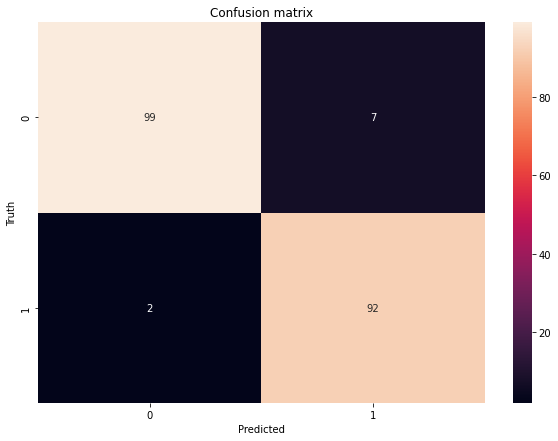

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


predictions = model.predict(X_test)
cm = confusion_matrix(predictions, y_test)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")

